# Credit Card Fraud Detetion

## Identify fraudulent credit card transaction

- It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. Make your machine learning model learn to detect these anomalous transactions

- This Dataset is quite different from regular classification problems. Because it demonstrates various classification techniques on imbalanced dataset. The goal is to perform a binary classification of Class 0(not Fraud) and Class 1(Fraud)

### About Data by Kaggle


The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# 1. Import the Module

In [1]:
!pip install imblearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from pandas import Series, DataFrame
from sklearn.metrics import confusion_matrix
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import MiniBatchKMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn import svm
import warnings
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

# 2. Road the Data

####  Information of dataset(by Kaggle)

- The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



In [2]:

df = pd.read_csv('creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

There are more of non-fraud transactions compared to fraudulent transactions.

In [7]:
df.iloc[:,-1].value_counts()/df.iloc[:,-1].count()*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

Valid transactions is 99.83% of the dataset and Fraud transactions is 0.17% of the dataset.

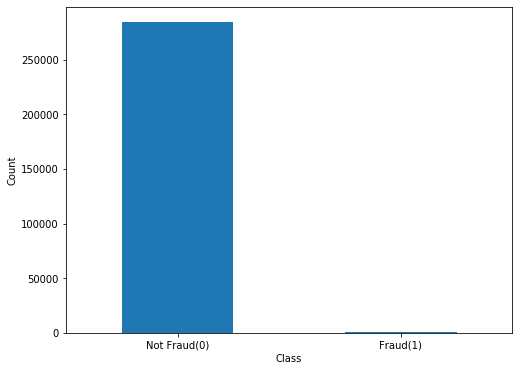

In [8]:
fig, ax=plt.subplots(figsize=(8,6))
df.groupby(['Class'])['Class'].count().plot(kind='bar')
plt.xticks([0,1],['Not Fraud(0)','Fraud(1)'],rotation=0)
plt.ylabel('Count')
plt.show()

### Observation
The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions. The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done. The ‘Time’ and ‘Amount’ features are not transformed data. There is no missing value in the dataset.


#### Class-Imbalance

- We discover that the classes are highly imbalanced with most of the transactions are non-fraud.italicized text

Using this imbalanced data as it is is not appropriate to train the model to classify whether a transaction is fraudulent or not.

Algorithm does not have a decent amount of fraudulent-data to learn the patterns of fraudulent transactions from Imbalanced data. Therfore, it most probably assumes that every transaction is non-fraudulent. 

- Solutions? To overcome this bias, we need a more even distribution of classes that the classifier will be trained on oversampling.


# 3. Data Split


Let's split the data randomly into train and test sets

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
X= df.iloc[:,:-1]
y=df['Class']

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)
train = pd.concat([X_train, y_train],axis=1)
test = pd.concat([X_test, y_test],axis=1)

In [12]:
print('Transactions in X_train dataset :', X_train.shape)
print('Transactions in X_test dataset:', X_test.shape)
print("Transaction classes in y_train dataset: ", y_train.shape)
print("Transaction classes in y_test dataset: ", y_test.shape)
print("Percentage of fraud transactions in train is: ",round(train.Class.mean(),4))
print("Percentage of fraud transactions in test is: ",round(test.Class.mean(),4))


Transactions in X_train dataset : (199364, 30)
Transactions in X_test dataset: (85443, 30)
Transaction classes in y_train dataset:  (199364,)
Transaction classes in y_test dataset:  (85443,)
Percentage of fraud transactions in train is:  0.0017
Percentage of fraud transactions in test is:  0.0017


In [13]:
print(y_train.value_counts()/y_train.count()*100)
print(y_test.value_counts()/ y_test.count()*100)

0    99.82695
1     0.17305
Name: Class, dtype: float64
0    99.827955
1     0.172045
Name: Class, dtype: float64


The proportion of the train and test is similarly divided at a rate of 99.8% vs. 0.17% of the original data.

# 4. Exploratory Data Analysis

## 4.1 'Time'

In [14]:
X_train['Time'].describe()

count    199364.000000
mean      94799.493936
std       47499.835491
min           0.000000
25%       54126.000000
50%       84633.500000
75%      139334.250000
max      172792.000000
Name: Time, dtype: float64

In [15]:
X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600

C:\Users\ktkwd\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [16]:
X_train['Time'].max()/24

1.9999074074074075

So the transactions indeed occur over a two-day period. Next let's plot a histogram of transaction times, with one bin per hour: 

따라서 거래는 실제로 약  2 일 동안 발생합니다. 
다음으로 시간당 하나의 빈을 사용하여 트랜잭션 시간의 히스토그램을 플로팅 해 보겠습니다.

Text(0.5, 1.0, 'Transaction Times')

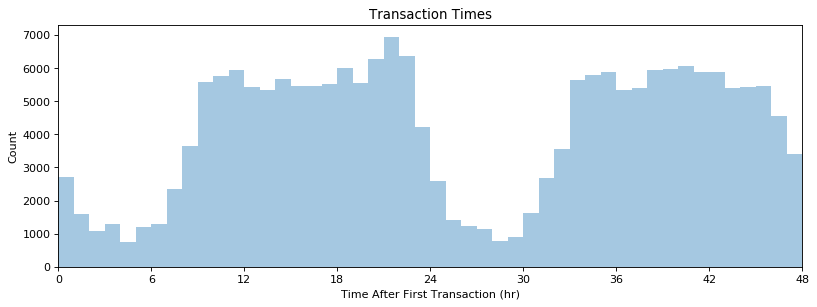

In [17]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Time'], bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

It looks like there are two lulls in credit card transactions during nighttime on each day. 


매일 밤에 신용 카드 거래가 두 번의 소강 상태 인 것 같습니다.

# 4.2 'Amount'

In [18]:
X_train['Amount'].describe()

count    199364.000000
mean         88.667581
std         246.104869
min           0.000000
25%           5.650000
50%          22.000000
75%          77.580000
max       19656.530000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Transaction Amounts')

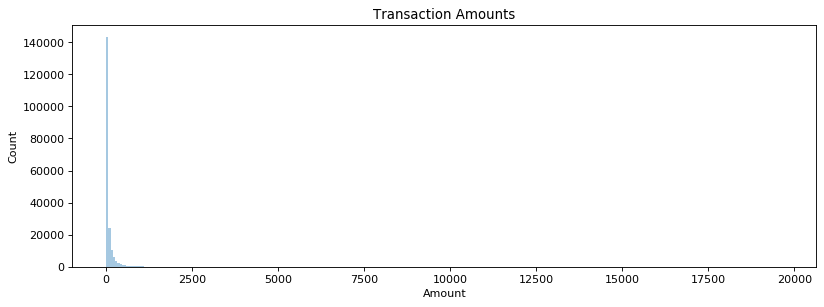

In [19]:

plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amounts')

Amount is a highly skewed variable with maximum observed value of 25,691.16 however most transactions averaging at only 88. Again because of the wide distribution of values we will scale the values down and align with the PCA variables.

Amount는 관찰 된 최대 값이 25,691.16 인 고도로 치우친 변수이지만 대부분의 트랜잭션은 평균 88 개에 불과합니다. 값이 광범위하게 분포되어 있기 때문에 값을 축소하고 PCA 변수에 맞춰 정렬합니다. 

Text(0.5, 1.0, 'Transaction Amounts')

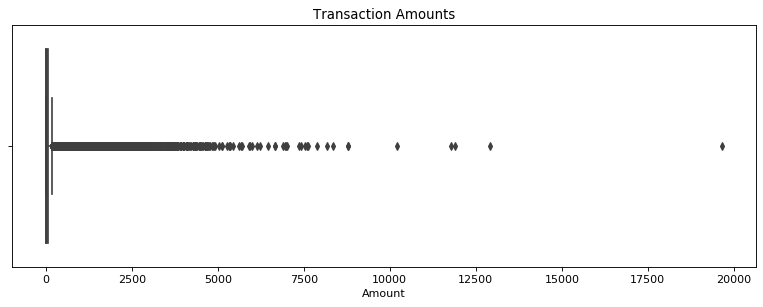

In [20]:
# The histogram is hard to read due to some outliers 
# we can't see. A boxplot will show the outliers:

plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

We can see there are no outliers on the left and many outliers on the right. So the amounts certainly seem right-skewed. We can calculate the skewness to be sure:

In [21]:

X_train['Amount'].skew()

13.632237777131827

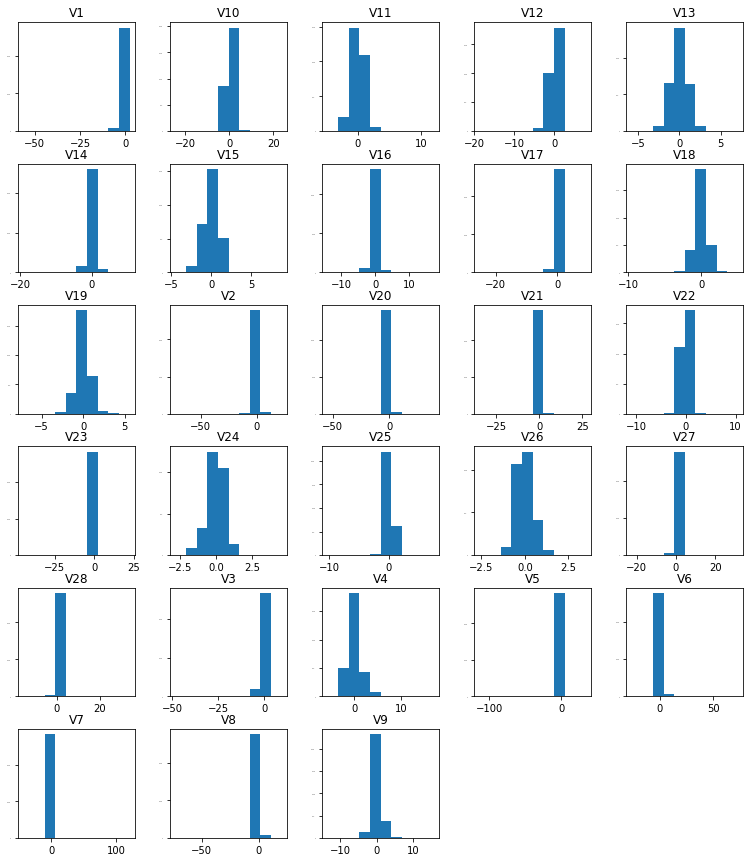

In [22]:
df.drop(['Time','Amount','Class'],axis=1).hist(
    figsize=(13,15), 
    ylabelsize=False,
    grid=False
);

Looking closer we can see some variety in the distributions even though all the PCA variables have mean values of 0.




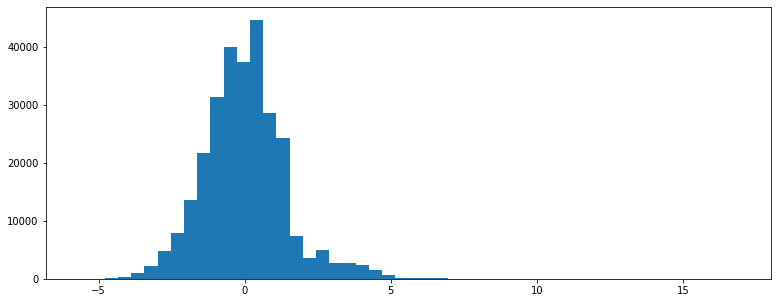

In [23]:
df.V4.hist(
    bins=50,
    figsize=(13,5),
    grid=False
);

 V4 shows a slightly right skewed,

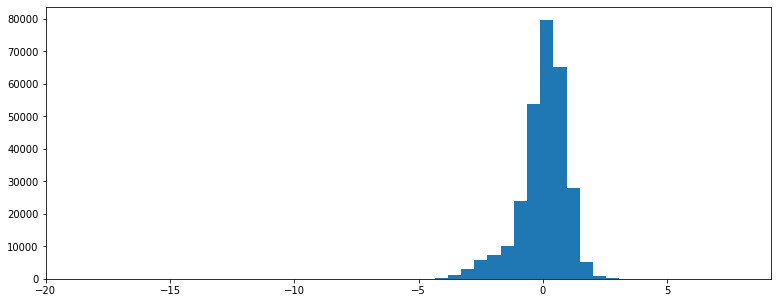

In [24]:
df.V12.hist(
    bins=50,
    figsize=(13,5),
    grid=False
);

V12 appears to be left skewed

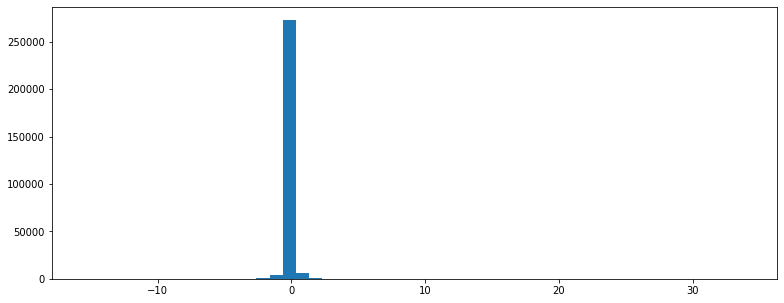

In [25]:
df.V28.hist(
    bins=50,
    figsize=(13,5),
    grid=False
);

V12 shows a very narrow distribution

In [26]:
pca_vars = ['V%i' % k for k in range(1,29)]

In [27]:

X_train[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,...,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000
mean,0.000315,-0.002690,-0.001532,0.000721,-0.001494,-0.000210,-0.000870,-0.001980,0.000212,0.001357,...,0.000490,0.000430,-0.000014,-0.000022,-0.000258,0.000362,0.000395,-0.000094,-0.000027,0.000015
std,1.963554,1.657379,1.516716,1.417138,1.368744,1.328673,1.226018,1.212338,1.102021,1.092801,...,0.814506,0.770257,0.743450,0.727625,0.629145,0.605298,0.521175,0.481842,0.401042,0.324849
min,-46.855047,-63.344698,-33.680984,-5.560118,-42.147898,-23.496714,-43.557242,-73.216718,-13.434066,-24.588262,...,-7.213527,-23.646890,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.534330,-22.565679,-11.710896
25%,-0.921539,-0.601213,-0.892838,-0.848835,-0.692874,-0.769177,-0.554220,-0.209086,-0.644753,-0.535493,...,-0.456800,-0.211662,-0.229272,-0.544345,-0.162021,-0.354179,-0.316088,-0.327327,-0.070864,-0.052907
50%,0.019705,0.063784,0.177888,-0.017852,-0.055832,-0.274397,0.039228,0.021803,-0.049633,-0.092069,...,0.004422,-0.062889,-0.029045,0.006744,-0.010915,0.040974,0.018014,-0.052287,0.001064,0.011119
75%,1.316707,0.802437,1.025529,0.745566,0.609349,0.397928,0.569638,0.327023,0.597096,0.458129,...,0.460367,0.132834,0.187095,0.531017,0.147503,0.438953,0.350802,0.241082,0.090491,0.077989
max,2.451888,22.057729,9.382558,16.715537,34.099309,23.917837,44.054461,20.007208,15.594995,23.745136,...,5.572113,39.420904,27.202839,10.503090,22.528412,4.022866,7.519589,3.463246,12.152401,22.620072


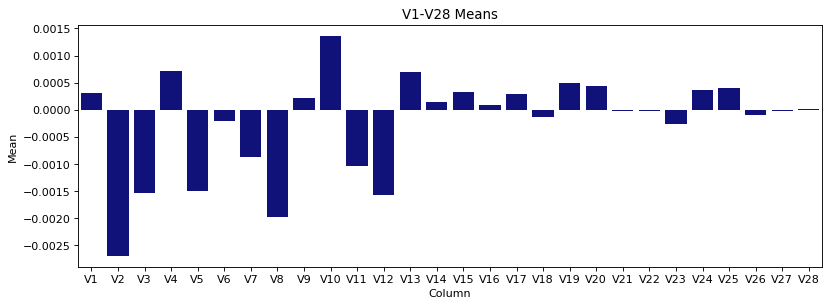

In [28]:

plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means');

All of V1-V28 have approximately zero mean. Now plot the standard deviations:



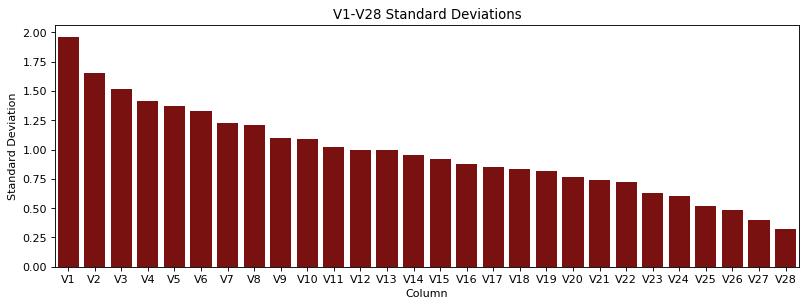

In [29]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].std(), color='darkred')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('V1-V28 Standard Deviations');

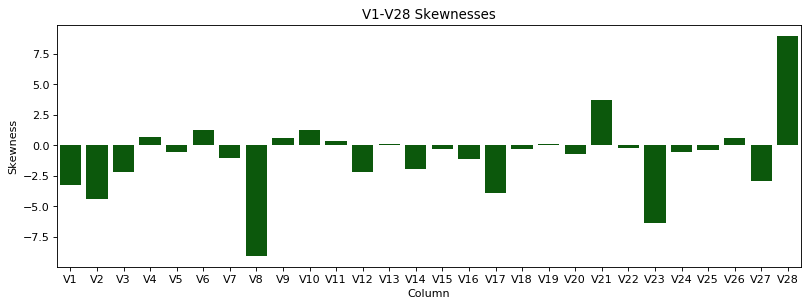

In [30]:

plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses');

From above plot we can see fradulant transaction has more skewness than normal transaction

A few of the PCA variables are significantly skewed. Let's plot a histogram of one of the particularly skewed variables, V8, to see the distribution in detail.


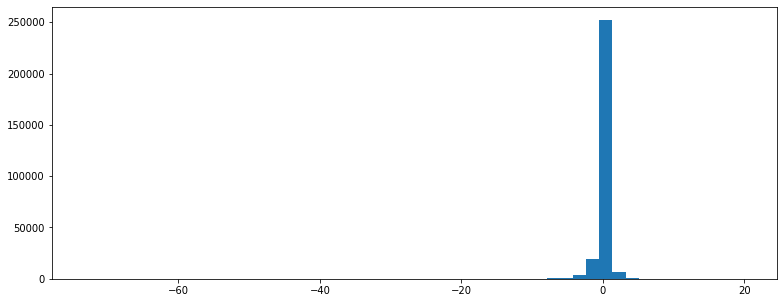

In [31]:
df.V8.hist(
    bins=50,
    figsize=(13,5),
    grid=False
);

Normalization is important in PCA since it is a variance maximizing exercise. It projects your original data onto directions which maximize the variance.

since V1, V2, … V28 are the principal components obtained with PCA we can clearly see that from above plot that from V1 to V28 variables are normalized. Variable 'Time' and 'Amount' is not normalized.

Note the log scale on the y-axis in the plot below:

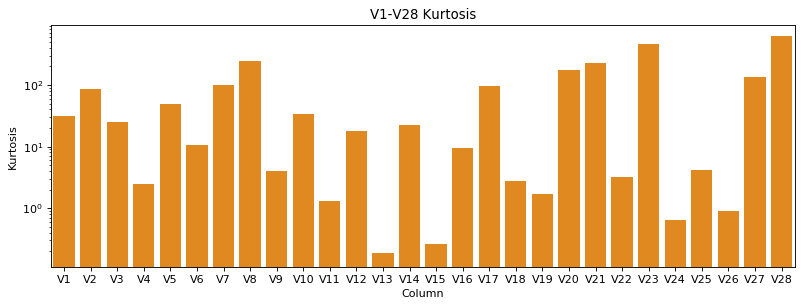

In [32]:
plt.figure(figsize=(12,4), dpi=80)
plt.yscale('log')
sns.barplot(x=pca_vars, y=X_train[pca_vars].kurtosis(), color='darkorange')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtosis');

We've learned that many of the PCA variables are heavy-tailed. The large numbers of outliers in V1-V28 motivates us to consider robust descriptive statistics.

우리는 많은 PCA 변수가 두꺼운 꼬리라는 것을 배웠습니다. V1-V28의 이상 값이 많기 때문에 강력한 기술 통계를 고려하게됩니다. 중앙값을 플로팅 해 보겠습니다.

Let's plot the medians:

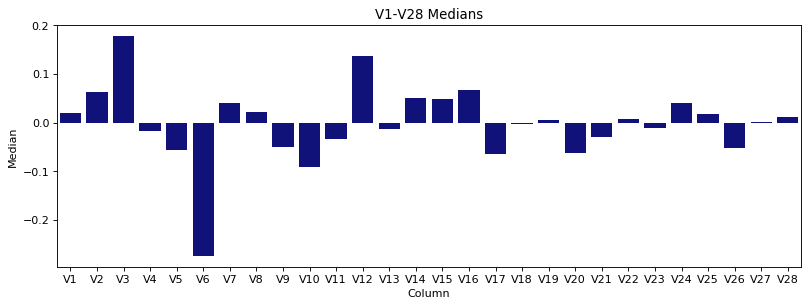

In [33]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('V1-V28 Medians');

The medians are also roughly zero.

# 5. Feature Scaling


Since most of our data has already been scaled. Let's scale the columns that are not yet scaled about Amount and Time.

### 5-1. Data normalization


- Looking at Kaggle's data, there are columns named Amount and Time. And there are columns from V1 to V28, but I don't know exactly what this means. So this time, let's look at the data with focus on the Amount and Time columns.
First, let's look at the distribution of amount and time data using python seaborn


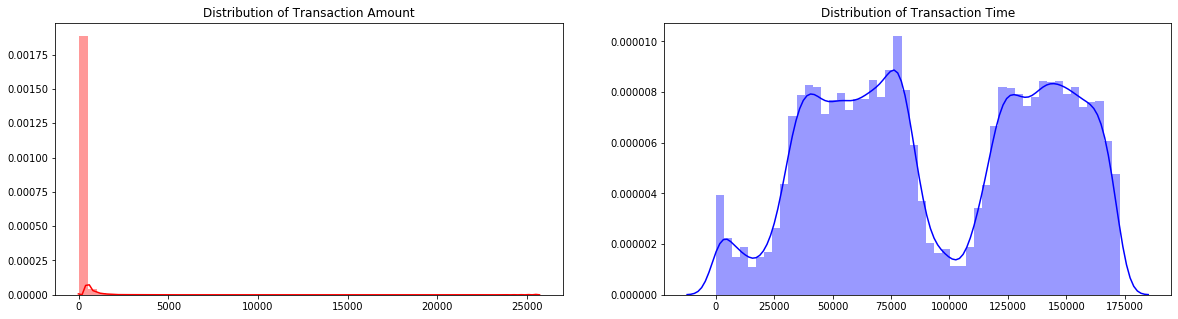

In [34]:
# Let's look at the distribution of amount and time data using python seaborn.

fig, ax= plt.subplots(1,2, figsize=(20,5))

amount_val=df['Amount'].values
time_val=df['Time'].values

sns.distplot(amount_val, ax=ax[0] , color='r')
ax[0].set_title('Distribution of Transaction Amount')

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time');


- Amount tends to be mostly focused towards the zero area. However, it is very finely connected to 25000. Also, although the data distribution of the Time column is more even than Amount, there are values from at least 0 to over 160000.

- The problem with these two is that the data distribution is too large right now. If the data distribution increases in this way, the model may not work properly because there may be cases where the data distribution is large.

- Therefore, if the data distribution is uneven, data must be normalized.




## 5-2.Data normalization about Amount column


- Let's apply Standarization and log scale.

In [35]:
scaler=StandardScaler()
df['scaled_amount']=scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [36]:
# When Input value is so small, using np.log1p or np.expm1 to calculate, we will get the more accutrate result than np.log or np.exp according .
# So I will use log1p.

df['loged_amount']=np.log1p(df['Amount'].values.reshape(-1,1))

Let's use the standardscaler to look at the standardization distribution and log scale

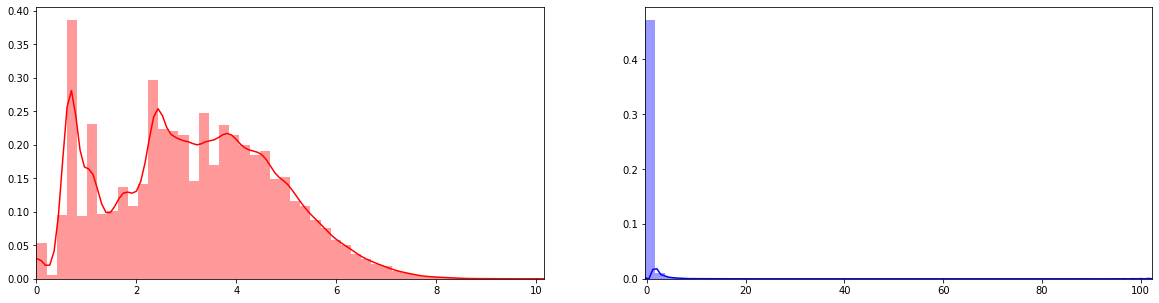

In [37]:
fig, ax=plt.subplots(1,2, figsize=(20,5))
loged_amount=df['loged_amount'].values
scaled_amount=df['scaled_amount'].values

sns.distplot(loged_amount, ax=ax[0], color='r')
ax[0].set_xlim([min(loged_amount), max(loged_amount)])

sns.distplot(scaled_amount, ax=ax[1], color='b')
ax[1].set_xlim([min(scaled_amount), max(scaled_amount)])



plt.show()

- The left is a graph that normalizes the data using log scale, and the right is a graph that has been changed to standard scale.

- Both have significantly reduced the data distribution from 0 to 25000.

- Standard scale has a fairly similar data distribution to the amount.

- So here I am going to choose the standard scale.



## 5-3. Data normalization about Time column


In the Time column, I will normalize the data with three scalers: robust scale, log scale, and standard scale.

In [38]:
rob_scaler=RobustScaler()

In [39]:
df['scaled_time']=rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['loged_time']=np.log1p(df['Time'].values.reshape(-1,1))
df['std_time']=scaler.fit_transform(df['Time'].values.reshape(-1,1))

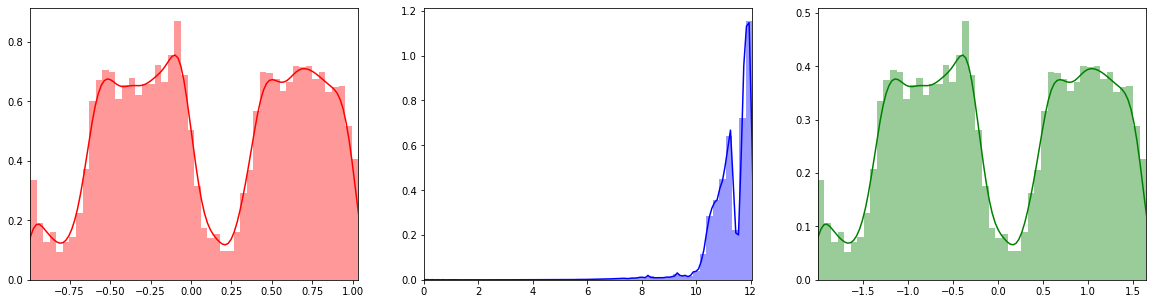

In [40]:
fig, ax=plt.subplots(1,3, figsize=(20,5))
scaled_time=df['scaled_time'].values
loged_time=df['loged_time'].values
std_time=df['std_time'].values


sns.distplot(scaled_time, ax=ax[0], color='r')
ax[0].set_xlim([min(scaled_time), max(scaled_time)])

sns.distplot(loged_time, ax=ax[1], color='b')
ax[1].set_xlim([min(loged_time), max(loged_time)])

sns.distplot(std_time ,ax=ax[2], color='g')
ax[2].set_xlim([min(std_time), max(std_time)])


plt.show()

- The three figures are robust scale, log scale, and standard sclae from the left.

- Similar to existing data are robust scale and standard scale. Among them, the robust sclae has less data distribution and does not take overfitting, so I will adopt this.



## 5-4 Add normalization data

I am gonna add Standard scale for Amount and Robust scale for Time.

In [41]:
#Now, I will change the Amount and Time data to normalized data and drop the unnecessary data.

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,scaled_amount,loged_amount,scaled_time,loged_time,std_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,0.244964,5.014760,-0.994983,0.000000,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,-0.342475,1.305626,-0.994983,0.000000,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,5.939276,-0.994972,0.693147,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,0.140534,4.824306,-0.994972,0.693147,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,-0.073403,4.262539,-0.994960,1.098612,-1.996541


In [42]:
df.drop(['loged_time','std_time','loged_amount','Time','Amount'], axis=1, inplace=True)

In [43]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-0.994960


In [44]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'scaled_time'],
      dtype='object')

In [45]:
scaled_amount=df['scaled_amount']
scaled_time=df['scaled_time']
df.drop(['scaled_time', 'scaled_amount'],axis=1, inplace=True)
df.insert(0,'scaled_amount',scaled_amount)
df.insert(1,'scaled_time',scaled_time)

In [46]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Boxplot to search differents distributions

We are searching for features that diverges from normal distribuition

<Figure size 432x288 with 0 Axes>

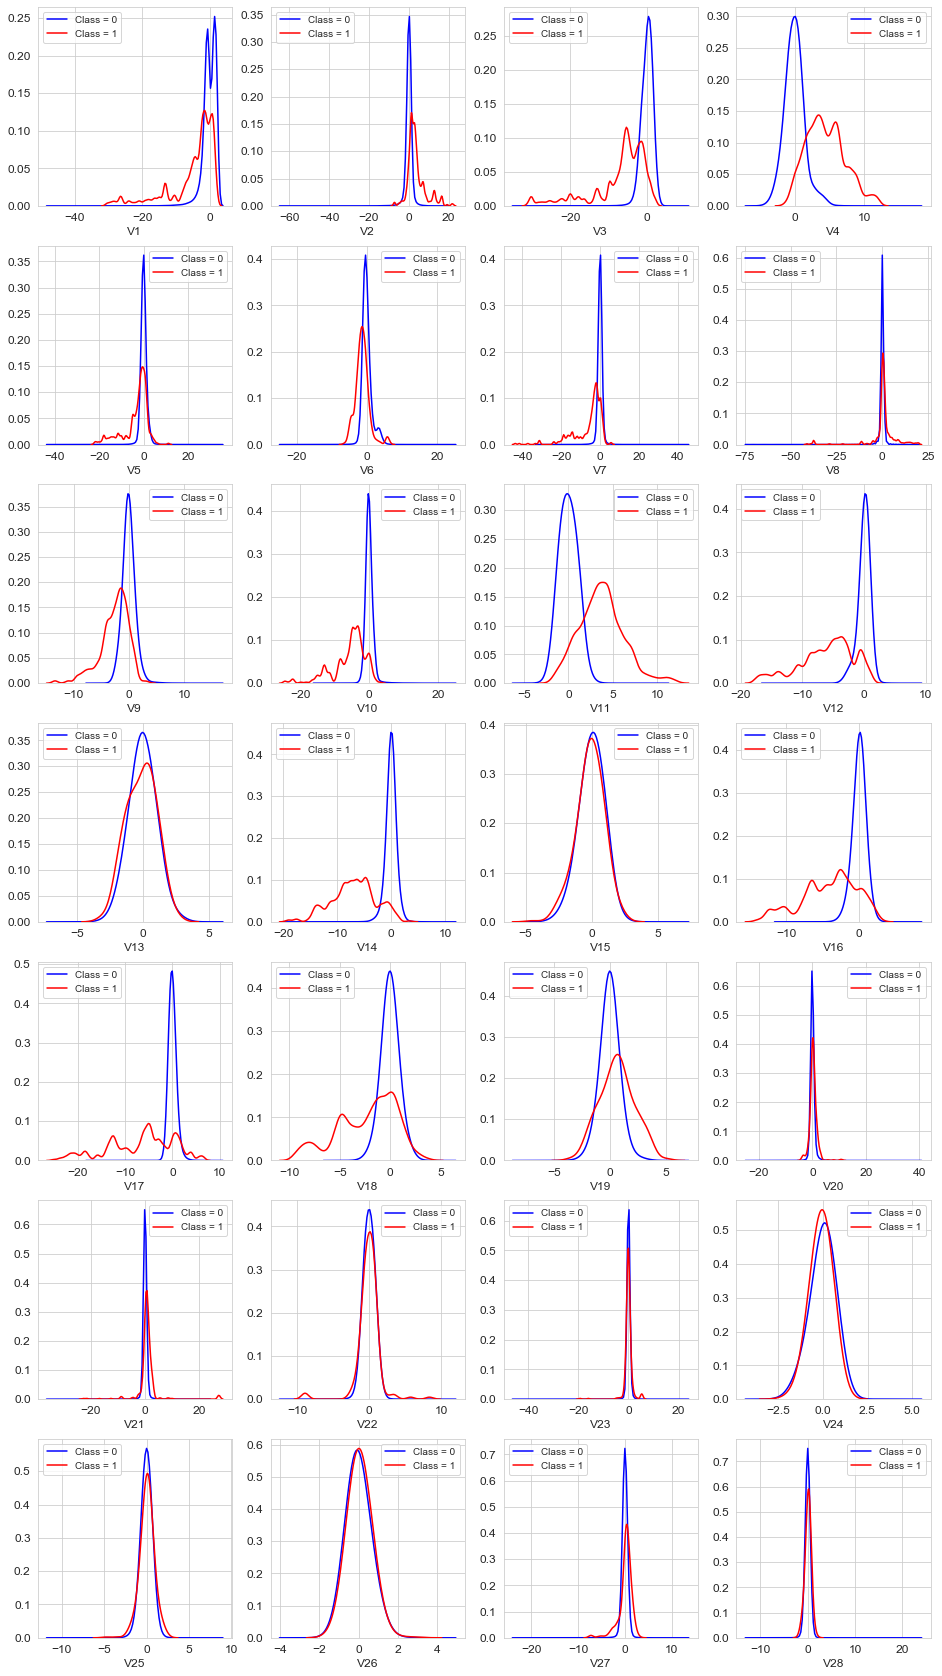

In [47]:
#Features density plot
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28']

i = 0
t0 = train.loc[train['Class'] == 0]
t1 = train.loc[train['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,30))

for feature in col:
    i += 1
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0", color='b')
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1", color='r')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### Observation:

- V3, V4, V10, V11, V17-V19 have clearly separated distributions for Class values 0 and 1
- V1, V2, V7, V9, V12, V14, V16, V18 have partially saperated distribution for Class 0 and 1
- V13, V15, ,V20, V22-V28 have almost similar distribution for Class 0 and 1
- V5, V6, V8, V21 have quite similar distribution for Class 0 and 1


Mainly, without Time and Amount, the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

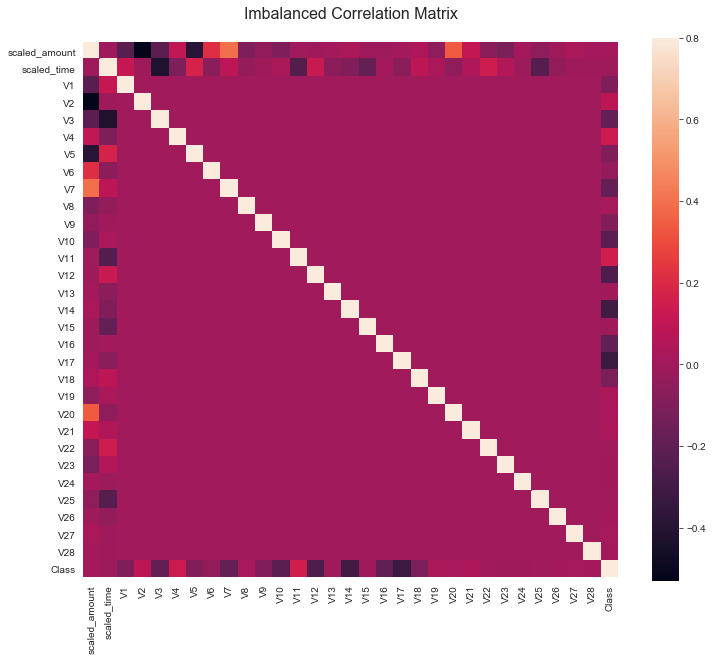

In [48]:
f, ax = plt.subplots(1, 1, figsize=(12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
ax.set_title("Imbalanced Correlation Matrix\n", fontsize=16)
plt.show()

# 6. Apply OverSampling


In [49]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 30)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 30)
Number transactions y_test dataset:  (85443,)


In [50]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 199019 



In [51]:
sm = SMOTE(random_state=10)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [52]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (398038, 30)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


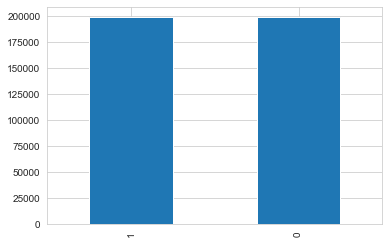

In [53]:
# observe that data has been balanced
pd.Series(y_train_res).value_counts().plot.bar();

# 7. Building Model& Evaluate the model



##  Building Model - Supervised Learning 
Let's apply different Machine Learning Algorithms then compare their metrics to select the most suitable ML algorithm. Algorithms to be used are:
- 1.Logisitic Regression
- 2.Decision Tree
- 3.Random Forest

The metrics we'll use initially are:

- Accuracy
- Precision
- F1-Score


#  Evaluate the Model
 Let's predict the labels for train and test data, Use the confusion matrix and calculate the recall and precision values.



- Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading. Metrics that can provide better insight include:

- Confusion Matrix: a talbe showing correct predictions and types of incorrect predictions.

- Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier's exactness. Low precision indicates a high number of false positives.

- Recall: the number of true positives divided by the number of -positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier's completeness. Low recall indicates a high number of false negatives.

- F1: Score: the weighted average of precision and recall.

Since our main objective with the dataset is to prioritize accuraltely classifying fraud cases the recall score can be considered our main metric to use for evaluating outcomes.

### 7-1-1.  Build  XGBoost Model

In [54]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [55]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 10, n_jobs = -1)
x=xgb.fit(X_train, y_train)

C:\Users\ktkwd\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [56]:

np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.70, test_size = 0.30, random_state = 10)

In [57]:
# Building the XGBoost Model
import xgboost as xgb 
xg = xgb.XGBClassifier()

#training the Model
xg.fit(X_train,y_train)

[10:08:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [59]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred


In [60]:
cmat, pred = RunModel(xg, X_train, y_train, X_test, y_test)

[10:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


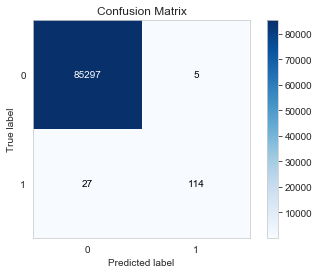

In [61]:
!pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [62]:
accuracy_score(y_test, pred)

0.9996254813150287

- 85295 transactions classified as normal and were actually normal
- 7 transactions classified as fraud but that were really normal 
- 34 transactions classified as normal but which were fraud 
- 101 transactions classified as fraud and were actually fraud.
- Thus, although the accuracy was great 

### 7-2-1. Build Logistic Regression Model

In [63]:
lr= LogisticRegression(solver = 'lbfgs')
clf = GridSearchCV(lr,{"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, cv=5, verbose=5, n_jobs=3)
# fit the model
k=clf.fit(X_train_res, y_train_res)



Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    8.8s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:  1.3min finished


In [64]:
lr= LogisticRegression(solver = 'lbfgs')
clf = GridSearchCV(lr,{"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, cv=5, verbose=5, n_jobs=3)
# fit the model
k=clf.fit(X_train_res, y_train_res)



Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    7.2s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:  1.2min finished


In [65]:
print(k.best_params_)

{'C': 10, 'penalty': 'l2'}


In [66]:
lr=LogisticRegression(solver = 'lbfgs',penalty= k.best_params_['penalty'], C= k.best_params_['C'])
lr.fit(X_train_res, y_train_res)

# prediction for Training data
train_pred_sm =lr.predict(X_train_res)

# prediction for Testing data
test_pred_sm = lr.predict(X_test)

In [67]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_res))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.9587501695817987
Accuracy score for Testing Dataset =  0.967791393092471


### 7-2-2. Evaluate the Logistic Regression Model

In [68]:
lr_gridcv_best = clf.best_estimator_


In [69]:
y_test_pre = lr_gridcv_best.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test, y_test_pre)
print("Recall metric in the test dataset:", (cnf_matrix_test[1,1]/(cnf_matrix_test[1,0]+cnf_matrix_test[1,1] )))

Recall metric in the test dataset: 0.8723404255319149


####  Visualize the Confusion Matrix

Let us visualize the confusion matrices for the predictions made on the test set and over-sampled train set.



In [70]:
pd.Series(y_test).value_counts()

0    85302
1      141
Name: Class, dtype: int64

In [71]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85302
           1       0.04      0.87      0.08       141

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443



- Logistic Regression model achieves  f1 score of 0.98, with 98% sensitivity recall and 4% precision for the positive class. That is, the model correctly identifies 85% of the fraud cases which is true positives but only 4% of the transactions predicted as fraudulent were actually fraudulent. The model catches 85% of the fraudulent cases — it could identify more cases of fraud but would then also have lower precision.


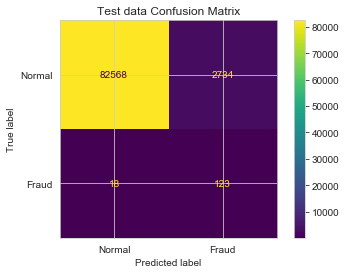

In [72]:
plot_confusion_matrix(k, X_test, y_test,  values_format = '.5g', display_labels=['Normal','Fraud'])
plt.title("Test data Confusion Matrix")
plt.show()

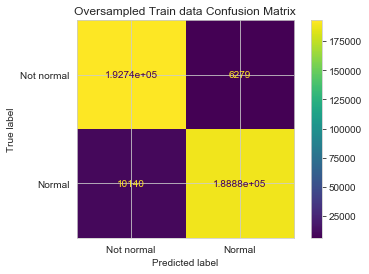

In [73]:
plot_confusion_matrix(k, X_train_res, y_train_res,  values_format = '.5g', display_labels=['Not normal','Normal']) 
plt.title("Oversampled Train data Confusion Matrix")
plt.show()

### 7-3-1. Build Decision Tree Model


In [74]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
d=decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
decision_tree_model.score(X_test, y_test)

0.999204147794436

In [75]:
pd.Series(y_test).value_counts()

0    85302
1      141
Name: Class, dtype: int64

In [76]:

cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[85263    39]
 [   29   112]]


### 7-3-2. Evaluate Decision Tree model

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.74      0.79      0.77       141

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



- Decision Tree model achieves an overall f1 score of 1.00, with 76% sensitivity recall and 78% precision for the positive class. That is, the model correctly identifies 76% of the fraud cases which is true positives but only 78% of the transactions predicted as fraudulent were actually fraudulent. The model catches 76% of the fraudulent cases 




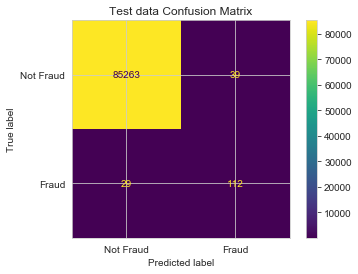

In [78]:
plot_confusion_matrix(d, X_test, y_test, display_labels=['Not Fraud','Fraud'])
plt.title("Test data Confusion Matrix")
plt.show()


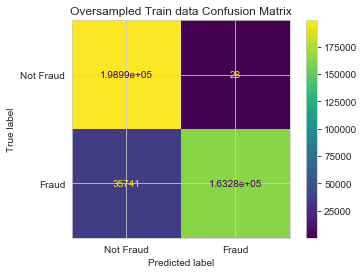

In [79]:
plot_confusion_matrix(d, X_train_res, y_train_res,  values_format = '.5g', display_labels=['Not Fraud','Fraud']) 
plt.title("Oversampled Train data Confusion Matrix")
plt.show()

### 7-4-1. Build Random Forest Model



We do not need to rescale the data for tree-based models




In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc=RandomForestClassifier(n_estimators=20)
r=rfc.fit(X_train,y_train)

In [82]:
y_pred=rfc.predict(X_test)

In [83]:
print(accuracy_score(y_test,y_pred))

0.9996371850239341


In [84]:
#Obtaining the confusion matrix
print(confusion_matrix(y_test,y_pred))

[[85297     5]
 [   26   115]]


### 7-4-2. Evaluate Random Forest Model

In [85]:
pd.Series(y_test).value_counts()

0    85302
1      141
Name: Class, dtype: int64

In [86]:
#Brief summary of the classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.96      0.82      0.88       141

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



- Random Forest model achieves an overall f1 score of 1.00, with 75% sensitivity recall and 94% precision for the positive class. That is, the model correctly identifies 73% of the fraud cases which is true positives but only 94% of the transactions predicted as fraudulent were actually fraudulent. The model catches 75% of the fraudulent cases 



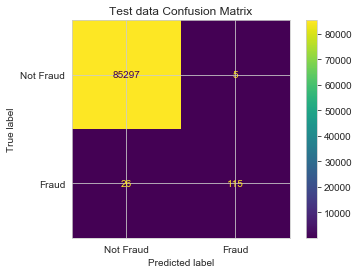

In [87]:
plot_confusion_matrix(r, X_test, y_test, display_labels=['Not Fraud','Fraud'])
plt.title("Test data Confusion Matrix")
plt.show()

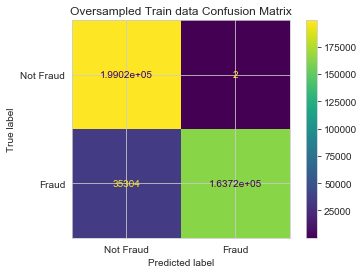

In [88]:
plot_confusion_matrix(r, X_train_res, y_train_res,  values_format = '.5g', display_labels=['Not Fraud','Fraud']) 
plt.title("Oversampled Train data Confusion Matrix")
plt.show()

- After training each of the models, these are the final results.  Random Forest technique models are very promising for our dataset! Model has a high true positive rate and a low false-positive rate, which is exactly what we’re looking for.



### 7-5-1. Build SVM Model

In [89]:
svc = svm.SVC(kernel='rbf').fit(X_train, y_train) 


In [90]:
y_test_pred = svc.predict(X_test)


### 7-5-2. Evaluate SVM Model

In [91]:
# Accuracy
print("Train set Accuracy: ", accuracy_score(y_train, svc.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, y_test_pred))

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Train set Accuracy:  0.9982394012961217
Test set Accuracy:  0.9983497770443454
[[85302     0]
 [  141     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.00      0.00      0.00       141

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



C:\Users\ktkwd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusion 
- 1.First loaded the data, explored it, and checked for any null values. While exploring, I found that the data is of high class-imbalance, with around 99.83% being valid transactions whereas about 0.17% are fraudulent.

- 2.It is not a good idea to train a classifier with such highly imbalanced data as it leads to mere assumptions rather than learning by the algorithm. oversample the data to achieve a balance between the class-wise data samples.

- 3.Split the data into train and test parts, in order to prevent any data leakage and to keep the test data untouched, before oversampling.

- 4.I have scaled the Amount and Time features using StandardScaler.

- 5.We then applied the SMOTE technique to oversample the train data and formed a new dataset with the thus obtained over-sampled datapoints.

- 6. We got the best Random forest classifier and then used the best estimator thus obtained to evaluate its performance on the unseen test data. I calculated the recall, confusion-matrix and roc-auc scores.

###### Random Forest is the best model to recognize fraudulent credit card transactions.
